In [2]:
import pandas as pd

data = pd.read_csv('/home/lab/dataset/fer2013.csv', header=None)
data.head()

,0,1,2
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training


In [3]:
print("Datanın satır ve sütün sayıları = ", data.shape)
print("Sütünların ismi = ", data.columns)

Datanın satır ve sütün sayıları =  (35888, 3)
Sütünların ismi =  Int64Index([0, 1, 2], dtype='int64')


In [8]:
data[2].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Usage              1
Name: 2, dtype: int64

In [10]:
training = data.loc[data[2] == "Training"]
public_test = data.loc[data[2] == "PublicTest"]
private_test = data.loc[data[2] == "PrivateTest"]

print("Eğitim seti = ", training.shape)
print("Genel test seti = ", public_test.shape)
print("Özel test seti = ", private_test.shape)

Eğitim seti =  (28709, 3)
Genel test seti =  (3589, 3)
Özel test seti =  (3589, 3)


In [14]:
training

,0,1,2
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
28705,2,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...,Training
28706,0,114 112 113 113 111 111 112 113 115 113 114 11...,Training
28707,4,74 81 87 89 95 100 98 93 105 120 127 133 146 1...,Training
28708,0,222 227 203 90 86 90 84 77 94 87 99 119 134 14...,Training


In [15]:
print("========================= Emotion Adetleri ===========================")
print("train adet = \n{}, \npublic adet = \n{}, \nprivate adet = \n{}".format(training[0].value_counts(),
      public_test[0].value_counts(), private_test[0].value_counts()))

========================= Emotion Adetleri ===========================
train adet = 
3    7215
6    4965
4    4830
2    4097
0    3995
5    3171
1     436
Name: 0, dtype: int64, 
public adet = 
3    895
4    653
6    607
2    496
0    467
5    415
1     56
Name: 0, dtype: int64, 
private adet = 
3    879
6    626
4    594
2    528
0    491
5    416
1     55
Name: 0, dtype: int64


In [21]:
from keras.utils import to_categorical
import keras
import numpy as np
train_labels = training[0]
train_labels = to_categorical(train_labels)

train_pixels = training[1].str.split(" ").tolist()
train_pixels = np.uint8(train_pixels)
train_pixels = train_pixels.reshape((28709, 48, 48, 1))
train_pixels = train_pixels.astype("float32") / 255


private_labels = private_test[0]
private_labels = to_categorical(private_labels)

private_pixels = private_test[1].str.split(" ").tolist()
private_pixels = np.uint8(private_pixels)
private_pixels = private_pixels.reshape((3589, 48, 48, 1))
private_pixels = private_pixels.astype("float32") / 255


public_labels = public_test[0]
public_labels = to_categorical(public_labels)

public_pixels = public_test[1].str.split(" ").tolist()
public_pixels = np.uint8(public_pixels)
public_pixels = public_pixels.reshape((3589, 48, 48, 1))
public_pixels = public_pixels.astype("float32") / 255

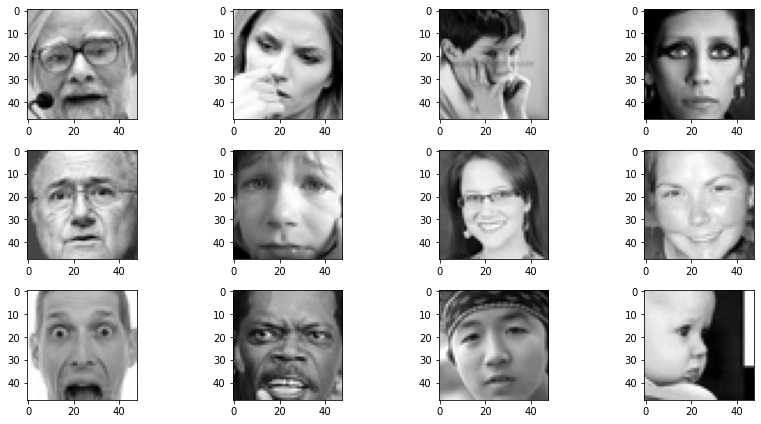

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(0, figsize=(12,6))
for i in range(1, 13):
    plt.subplot(3,4,i)
    plt.imshow(train_pixels[i, :, :, 0], cmap="gray")

plt.tight_layout()
plt.show()

In [31]:
train_pixels.shape, train_labels.shape

((28709, 48, 48, 1), (28709, 7))

In [33]:
public_pixels.shape, public_labels.shape

((3589, 48, 48, 1), (3589, 7))

In [34]:
private_pixels.shape, private_labels.shape

((3589, 48, 48, 1), (3589, 7))

In [35]:
np.save("train_pixels",train_pixels)

In [36]:
np.save("train_labels",train_labels)

In [37]:
np.save("public_pixels",public_pixels)

In [38]:
np.save("public_labels",public_labels)